# Question 3b

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the parameters
gamma = 0.85
sigma = 0.1
N = 7

In [3]:
# Compute the spread of states
z_max = 0.5/(1-gamma) + sigma * np.sqrt((N - 1) / (1 - gamma ** 2))
z_min = 0.5/(1-gamma) - sigma * np.sqrt((N - 1) / (1 - gamma ** 2))

# Create N evenly spaced points
z = np.linspace(z_min, z_max, N)

print("State Space (z-values):")
print(z)

State Space (z-values):
[2.86834278 3.02333963 3.17833648 3.33333333 3.48833018 3.64332704
 3.79832389]


In [4]:
# Compute base probability for staying in the same state
p = (1 + gamma) / 2

# Start with a 2x2 transition matrix
Pi = np.array([[p, 1 - p],
               [1 - p, p]])

print("Base case transition matrix:")
print(Pi)

Base case transition matrix:
[[0.925 0.075]
 [0.075 0.925]]


In [5]:
# Build the transition matrix for N > 2
for n in range(3, N + 1):
    Pi_old = Pi  # Store the previous transition matrix
    Pi_new = np.zeros((n, n))  # Create a new matrix of size n x n

    # Fill the four blocks based on recursive expansion
    Pi_new[:-1, :-1] += p * Pi_old  # Upper-left block
    Pi_new[:-1, 1:] += (1 - p) * Pi_old  # Upper-right block
    Pi_new[1:, :-1] += (1 - p) * Pi_old  # Lower-left block
    Pi_new[1:, 1:] += p * Pi_old  # Lower-right block

    # Normalize middle rows to keep probabilities valid
    Pi_new[1:-1, :] /= 2

    # Update Pi for the next iteration
    Pi = Pi_new

# Print matrix with better formatting
np.set_printoptions(precision=7)
print("Final transition probability matrix:")
print(Pi)

Final transition probability matrix:
[[6.2639805e-01 3.0473419e-01 6.1770443e-02 6.6778857e-03 4.0608765e-04
  1.3170410e-05 1.7797852e-07]
 [5.0789031e-02 6.4698820e-01 2.5728410e-01 4.1451021e-02 3.3499182e-03
  1.3554053e-04 2.1950684e-06]
 [4.1180295e-03 1.0291364e-01 6.5950472e-01 2.0717164e-01 2.4924935e-02
  1.3399673e-03 2.7072510e-05]
 [3.3389429e-04 1.2435306e-02 1.5537873e-01 6.6370415e-01 1.5537873e-01
  1.2435306e-02 3.3389429e-04]
 [2.7072510e-05 1.3399673e-03 2.4924935e-02 2.0717164e-01 6.5950472e-01
  1.0291364e-01 4.1180295e-03]
 [2.1950684e-06 1.3554053e-04 3.3499182e-03 4.1451021e-02 2.5728410e-01
  6.4698820e-01 5.0789031e-02]
 [1.7797852e-07 1.3170410e-05 4.0608765e-04 6.6778857e-03 6.1770443e-02
  3.0473419e-01 6.2639805e-01]]


# Question 3c

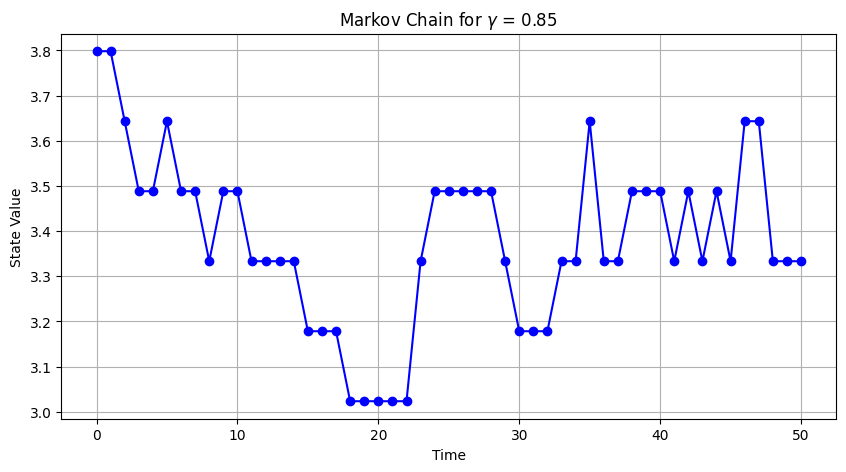

Transition Matrix:
 [[0.626398  0.3047342 0.0617704 0.0066779 0.0004061 0.0000132 0.0000002]
 [0.050789  0.6469882 0.2572841 0.041451  0.0033499 0.0001355 0.0000022]
 [0.004118  0.1029136 0.6595047 0.2071716 0.0249249 0.00134   0.0000271]
 [0.0003339 0.0124353 0.1553787 0.6637041 0.1553787 0.0124353 0.0003339]
 [0.0000271 0.00134   0.0249249 0.2071716 0.6595047 0.1029136 0.004118 ]
 [0.0000022 0.0001355 0.0033499 0.041451  0.2572841 0.6469882 0.050789 ]
 [0.0000002 0.0000132 0.0004061 0.0066779 0.0617704 0.3047342 0.626398 ]]

State Space Grid:
 [2.8683428 3.0233396 3.1783365 3.3333333 3.4883302 3.643327  3.7983239]

First 10 Simulated States: [3.79832388830861, 3.79832388830861, 3.6433270366501844, 3.4883301849917587, 3.4883301849917587, 3.6433270366501844, 3.4883301849917587, 3.4883301849917587, 3.333333333333333, 3.4883301849917587]


In [ ]:
# Simulation Parameters
np.random.seed(2025)  # Ensure reproducibility
T = 50

# Initialize State
state = np.random.choice(N)  # Randomly select an initial state
states = [z[state]]

# Simulate Markov Chain
for _ in range(T):
    state = np.random.choice(N, p=Pi[state])  # Move to next state
    states.append(z[state])

# ---- Plot the Simulation ----
plt.figure(figsize=(10, 5))
plt.plot(states, marker='o', linestyle='-', color='b')
plt.title("Markov Chain for $\gamma$ = 0.85")
plt.xlabel("Time")
plt.ylabel("State Value")
plt.grid(True)
plt.savefig('rouwenhorst_simulation.png')
plt.show()

# ---- Display Results ----
print("Transition Matrix:\n", Pi)
print("\nState Space Grid:\n", z)
print("\nFirst 10 Simulated States:", states[:10])

# Question 3d

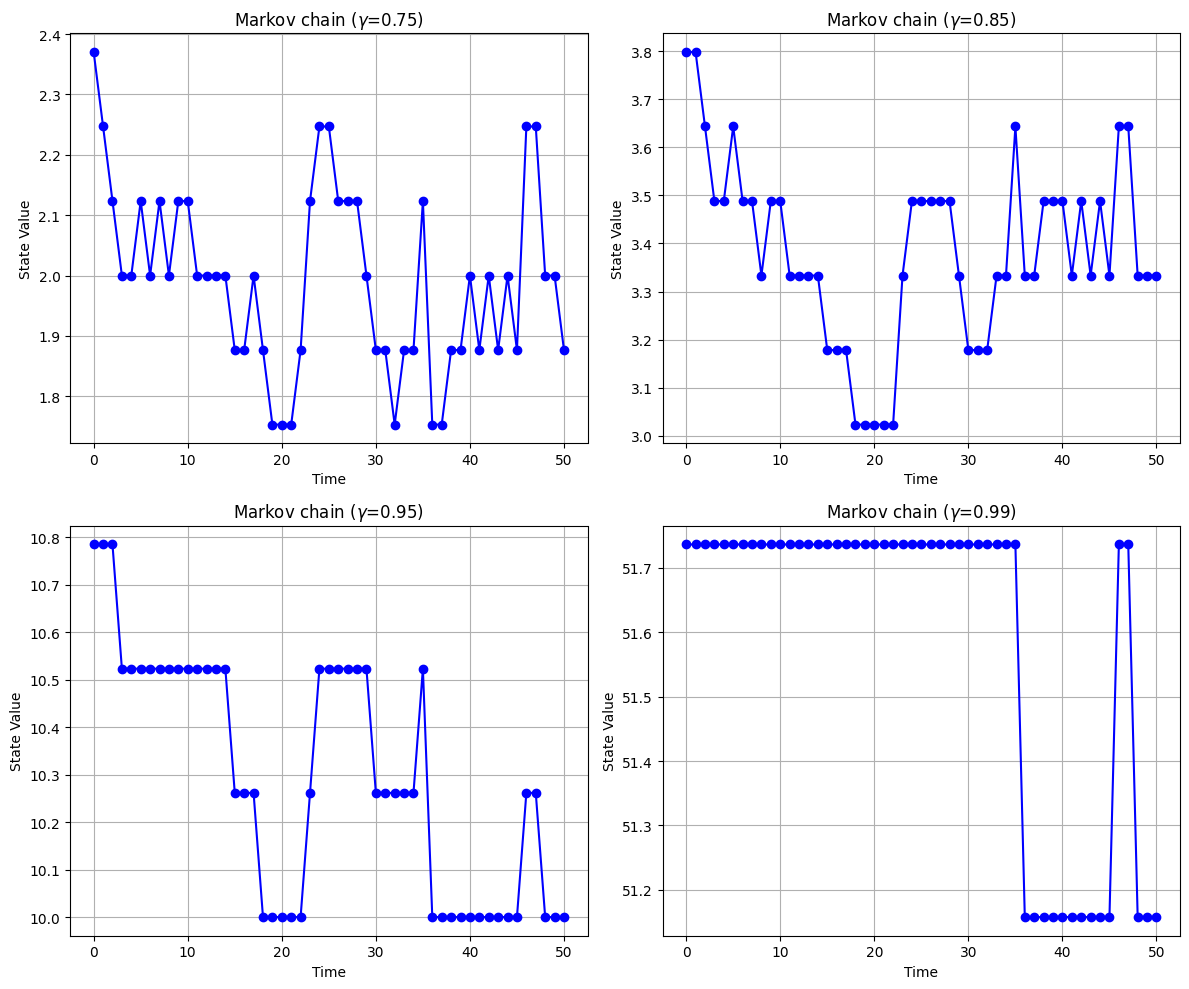

Transition Matrix:
 [[0.9703725 0.0292575 0.0003676 0.0000025 0.        0.        0.       ]
 [0.0048762 0.970495  0.0243825 0.000245  0.0000012 0.        0.       ]
 [0.0000245 0.009753  0.9705685 0.0195065 0.000147  0.0000005 0.       ]
 [0.0000001 0.0000735 0.0146298 0.970593  0.0146298 0.0000735 0.0000001]
 [0.        0.0000005 0.000147  0.0195065 0.9705685 0.009753  0.0000245]
 [0.        0.        0.0000012 0.000245  0.0243825 0.970495  0.0048762]
 [0.        0.        0.        0.0000025 0.0003676 0.0292575 0.9703725]]

State Space Grid:
 [48.2636028 48.8424018 49.4212009 50.        50.5787991 51.1575982
 51.7363972]

First 10 Simulated States: [51.73639724051965, 51.73639724051965, 51.73639724051965, 51.73639724051965, 51.73639724051965, 51.73639724051965, 51.73639724051965, 51.73639724051965, 51.73639724051965, 51.73639724051965]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma, N, T = 0.1, 7, 50
gamma_values = [0.75, 0.85, 0.95, 0.99]

# Initialize plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, gamma in enumerate(gamma_values):
    z_max = 0.5/(1-gamma) + sigma * np.sqrt((N - 1) / (1 - gamma ** 2))
    z_min = 0.5/(1-gamma) - sigma * np.sqrt((N - 1) / (1 - gamma ** 2))
    p = (1 + gamma) / 2

    # Initialize transition matrix
    Pi = np.array([[p, 1 - p], [1 - p, p]])

    # Construct transition matrix for N > 2
    for n in range(3, N + 1):
        Pi_old = Pi
        Pi = np.zeros((n, n))
        Pi[:-1, :-1] += p * Pi_old
        Pi[:-1, 1:] += (1 - p) * Pi_old
        Pi[1:, :-1] += (1 - p) * Pi_old
        Pi[1:, 1:] += p * Pi_old
        Pi[1:-1, :] /= 2

    # Simulation
    np.random.seed(2025)
    state = np.random.choice(N)
    z = np.linspace(z_min, z_max, N)
    states = [z[state]]
    for _ in range(T):
        state = np.random.choice(N, p=Pi[state])
        states.append(z[state])

    # Plot results
    axes[idx].plot(states, marker='o', linestyle='-', color='b')
    axes[idx].set_title(f"Markov chain ($\gamma$={gamma})")
    axes[idx].set_xlabel("Time")
    axes[idx].set_ylabel("State Value")
    axes[idx].grid(True)

plt.tight_layout()
plt.savefig('rouwenhorst_simulation2.png')
plt.show()

# Display results for last gamma value
print("Transition Matrix:\n", Pi)
print("\nState Space Grid:\n", z)
print("\nFirst 10 Simulated States:", states[:10])
